## 1. How many tennis players are included in the dataset?

In [11]:
import pandas as pd
import glob
from concurrent.futures import ThreadPoolExecutor

In [12]:
# Find parquet files for home and away teams
home_files= glob.glob(r'../data/raw/*/home_team_[0-9]*.parquet')
away_files= glob.glob(r'../data/raw/*/away_team_[0-9]*.parquet')

In [13]:
# Function to read 'player_id' column from parquet file
def read_parquet_file(path):
    return pd.read_parquet(path, columns=['player_id'], engine='pyarrow')

In [14]:
# Read home and away files in parallel using 4 threads each
with ThreadPoolExecutor(max_workers=4) as executor:
    df_home_list= list(executor.map(read_parquet_file, home_files))
    
with ThreadPoolExecutor(max_workers=4) as executer:
    df_away_list= list(executer.map(read_parquet_file, away_files))

In [15]:
# Combine dataframes from home and away teams into one
df_home= pd.concat(df_home_list, ignore_index=True)
df_away= pd.concat(df_away_list, ignore_index=True)
df_all_players= pd.concat([df_home, df_away], ignore_index=True)
df_all_players.head()

,player_id
0,59310
1,302566
2,258820
3,275105
4,212836


In [16]:
# Calculate and print number of unique players and missing values
unique_players= df_all_players['player_id'].dropna().unique()
print(f'unique players: {len(unique_players)}')

missing_players= df_all_players['player_id'].isna().sum()
print(f'missing players: {missing_players}')

unique players: 2644
missing players: 0


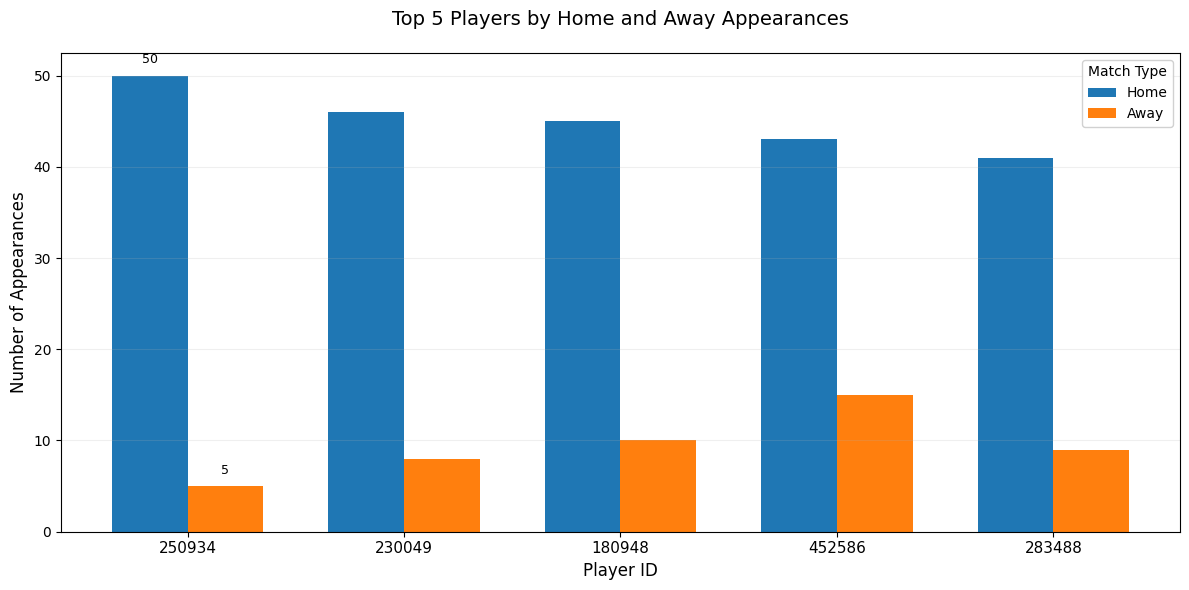

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
home_counts = df_home['player_id'].value_counts().rename('home_appearances')
away_counts = df_away['player_id'].value_counts().rename('away_appearances')
combined = pd.concat([home_counts, away_counts], axis=1).fillna(0)
top_combined = combined.sort_values(by='home_appearances', ascending=False).head(5)

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(top_combined))

home_bars = ax.bar(x - bar_width/2, top_combined['home_appearances'], bar_width, color='#1f77b4', label='Home')
away_bars = ax.bar(x + bar_width/2, top_combined['away_appearances'], bar_width, color='#ff7f0e', label='Away')

first_idx = 0
first_home = home_bars[first_idx].get_height()
first_away = away_bars[first_idx].get_height()

ax.text(x[first_idx] - bar_width/2, first_home + 1, f'{int(first_home)}', ha='center', va='bottom', fontsize=9)
ax.text(x[first_idx] + bar_width/2, first_away + 1, f'{int(first_away)}', ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_title('Top 5 Players by Home and Away Appearances', fontsize=14, pad=20)
ax.set_xlabel('Player ID', fontsize=12)
ax.set_ylabel('Number of Appearances', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_combined.index, fontsize=11)
ax.legend(title='Match Type', framealpha=0.9)
ax.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.savefig('../data/output/figures/img1.png')
plt.show()